In [114]:
from __future__ import absolute_import, division, print_function, unicode_literals
import tensorflow as tf
import glob
import imageio
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
from tensorflow.keras import layers
import time
import random

from IPython import display
from skimage.draw import random_shapes, rectangle, polygon, circle

[('circle', ((114, 375), (146, 407))), ('triangle', ((22, 158), (176, 332)))]
(176, 254.0, 332, 176)
(158, 22, 158, 158)


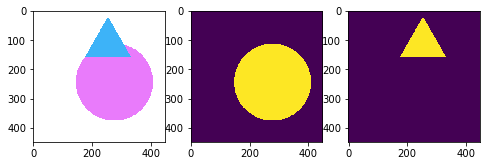

In [231]:
image, labels = random_shapes((448, 448), min_shapes=1, max_shapes=3,
                         min_size=128, allow_overlap=True)

fig=plt.figure(figsize=(8, 8))
#plt.imshow(image)
print(labels)
masks = []
for i in range(0, len(labels)):
    img= np.zeros((448, 448), dtype=np.uint8)
    
    if(labels[i][0] == 'rectangle'):
        rr, cc = rectangle((labels[i][1][0][0], labels[i][1][1][0]), (labels[i][1][0][1], labels[i][1][1][1]),
                   shape=img.shape)
    if(labels[i][0] == 'circle'):
        y = labels[i][1][0][1]- (labels[i][1][0][1] - labels[i][1][0][0]) / 2
        x = labels[i][1][1][1]-(labels[i][1][1][1] - labels[i][1][1][0]) / 2
        r = (labels[i][1][0][1] - labels[i][1][0][0]) / 2        
        rr, cc = circle(y, x, r, shape=img.shape)
    if(labels[i][0] == 'triangle'):
        x = (labels[i][1][1][0], labels[i][1][1][1] - (labels[i][1][1][1] - labels[i][1][1][0]) / 2, labels[i][1][1][1], labels[i][1][1][0])
        y = (labels[i][1][0][1], labels[i][1][0][0], labels[i][1][0][1], labels[i][1][0][1])
        print(x)
        print(y)
        rr, cc = polygon(y, x, shape=img.shape)
                
        
    img[rr, cc] = 1
    masks.append(img)

fig.add_subplot(1, len(labels)+1, 1)
plt.imshow(image)
for i in range(0, len(labels)):    
    fig.add_subplot(1, len(labels)+1, i+2)
    plt.imshow(masks[i])
plt.show()